This is a tutorial for using [ODT Flow Explorer](http://gis.cas.sc.edu/GeoAnalytics/od.html). The API reference is in [here](https://github.com/GIBDUSC/ODT_Flows/wiki/ODT-Flow-REST-APIs). Each API performs a specific task such as aggregate the flows for a selected place and download flow data for an interested geographic area. All APIs return data in CSV (comma-separated values) format. The API is specified in the **operation** parameter in the API query(see examples below).

# Import packages

Please install packages before importing. This toturial is tested in Windows 10 and Ubuntu 18.04 using Chrome browser.

In [440]:
import os
import pandas as pd
import numpy as np
import requests
from io import StringIO
import keplergl
import geopandas

# Query Examples

These examples show how to use API to obtain data in Jupyternotebook.

## od_by_place

Return the aggregated movement between the selected place and other places. (Corresponding to the Choropleth Map function in the Explorer).

In [441]:
target_FIPS = 32003   # Clark County, NV, Las Vegas city

params = {"operation": "od_by_place",
       "odt_cube": "twitter_od_2020_county",
        "place": str(target_FIPS),
       "begin": "01/01/2020",
       "end": "12/31/2020",
       "direction": "both"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [442]:
df = pd.read_csv(StringIO(r.text), header=None, names=["place", "count"])
df

,place,count
0,29159,4
1,39085,10
2,13191,2
3,37063,21
4,5067,3
...,...,...
1685,16025,1
1686,48179,2
1687,1113,2
1688,31109,18


## od_daily_movement_by_place

Return the daily inter-unit movements between the selected place and other places or the selected place's daily intra-unit movements. (Corresponding to the Daily Movements function in the Explorer).

In [443]:
target_FIPS = 32003   # Clark County, NV, Las Vegas city

params = {"operation": "od_daily_movement_by_place",
       "odt_cube": "sg_od_2020_county",
        "place": str(target_FIPS),
       "direction": "both"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [444]:
df = pd.read_csv(StringIO(r.text), header=None, names=["date", "count"])
df

,date,count
0,2020-01-01,90072
1,2020-01-02,85405
2,2020-01-03,84444
3,2020-01-04,81675
4,2020-01-05,67064
...,...,...
361,2020-12-27,54506
362,2020-12-28,50006
363,2020-12-29,48610
364,2020-12-30,50815


## od_daily_movement

Return the daily movements for all places of a specific geographic level (currently return intra movement). Supported geographic levels (odt_cube) and time periods for this API include:

- sg_us_state


- sg_us_county


- twitter_us_state


- twitter_world_country


- twitter_world_first_admin


- SafeGraph data from 01/01/2019 to 02/24/2021


- Twitter data from 01/01/2019 to 12/31/2020

In [453]:
params = {"operation": "od_daily_movement",
       "odt_cube": "twitter_world_country",
       "begin": "11/01/2019",
       "end": "03/10/2020"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [452]:
df = pd.read_csv(StringIO(r.text))
df

,place,date,intra_movement
0,AFG,2019-11-01,6
1,AFG,2019-11-02,5
2,AFG,2019-11-03,4
3,AFG,2019-11-04,8
4,AFG,2019-11-05,7
...,...,...,...
25917,ZWE,2020-03-06,38
25918,ZWE,2020-03-07,28
25919,ZWE,2020-03-08,26
25920,ZWE,2020-03-09,24


## od_extract_data

Return the selected OD flows in either temporally aggregated format or daily format.

In [462]:
params = {"operation": "od_extract_data",
       "odt_cube": "twitter_od_2019_county",
       "begin": "04/01/2019" ,
       "end": "04/02/2019",
       "bbox": "-90,90,-180,180",
       "type": "aggregated"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [463]:
df = pd.read_csv(StringIO(r.text))
df

,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
0,48477,48473,1,30.160,-96.398,30.083,-95.990
1,20079,20173,1,38.141,-97.431,37.684,-97.344
2,40051,40109,1,35.024,-97.930,35.468,-97.516
3,28043,28081,1,33.766,-89.808,34.264,-88.728
4,12095,12115,4,28.501,-81.322,27.325,-82.518
...,...,...,...,...,...,...,...
23995,36119,36087,7,41.155,-73.857,41.156,-73.976
23996,37143,37143,1,36.187,-76.469,36.187,-76.469
23997,20091,29021,1,38.954,-94.734,39.767,-94.847
23998,22087,13319,1,29.983,-90.011,32.678,-83.174


## od_download_url

Same as od_extract_data, but returns a download URL and number of records instead of directly returning the csv data.

In [465]:
params = {"operation": "od_download_url",
       "odt_cube": "twitter_od_2020_county",
       "begin": "01/01/2020" ,
       "end": "01/10/2020",
       "bbox": "20.19346,49.33148,-125.19531,-64.10156",
       "type": "daily"}

q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

In [473]:
download_url, count = r.text.split(",")
print("download_url:", download_url)
print("count:", count)

# download the response
file_name = download_url.split('/')[-1]
print("Downloading data...")
download_resp = requests.get(download_url, allow_redirects=True)
f = open(file_name, 'w')
f.write(download_resp.text)
print("Saved data in:", os.path.join(os.getcwd(), file_name))
df = pd.read_csv(StringIO(download_resp.text))
df

download_url: http://gis.cas.sc.edu/GeoAnalytics/download/daily_twitter_od_2020_county_01012020_01102020_1615660710959.csv
count: 154282
Saved data in: D:\Code\Jupyter\daily_twitter_od_2020_county_01012020_01102020_1615660710959.csv


,o_place,d_place,year,month,day,cnt,o_lat,o_lon,d_lat,d_lon
0,4023,4023,2020,1,2,7,31.423,-110.956,31.423,-110.956
1,48227,48095,2020,1,9,6,32.245,-101.442,31.169,-100.077
2,48005,48347,2020,1,8,3,31.372,-94.721,31.580,-94.659
3,28003,28089,2020,1,5,1,34.933,-88.523,32.571,-89.876
4,27115,27115,2020,1,9,1,45.830,-92.964,45.830,-92.964
...,...,...,...,...,...,...,...,...,...,...
154277,39025,39027,2020,1,9,1,38.962,-84.064,39.299,-83.969
154278,26045,26045,2020,1,1,25,42.685,-84.724,42.688,-84.711
154279,54011,54019,2020,1,1,1,38.408,-82.440,37.986,-81.153
154280,42019,42003,2020,1,4,9,40.724,-80.036,40.503,-80.039


# Case study No.1: Impact Covid-19 on Las Vegas in 2020

In [622]:
query_place = "GBR"  # Great Britain

rolling_width = 7

years = [2019, 2020]

years = [str(y) for y in years]

dfs = [] # store the results into a list

for year in years:
    odt_cube = f'twitter_od_{year}_country'

    params = {"operation": "od_daily_movement_by_place",
           "odt_cube": odt_cube,
            "place": query_place,
           "direction": "both"}

    q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
    r = requests.get(q, params=params)
    df = pd.read_csv(StringIO(r.text), header=None, names=["date", "count"])
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')  
    df['month_day'] = df.index.strftime("%m-%d")
    
    df['date'] = df.index
    df['year'] = df.index.year
    
    dfs.append(df)
    
df = pd.concat(dfs, axis=0)

df['count'] = df['count'].rolling(rolling_width, min_periods=1).mean().astype(int)
df

,count,month_day,date,year
date,,,,
2019-01-01,1256,01-01,2019-01-01,2019
2019-01-02,1166,01-02,2019-01-02,2019
2019-01-03,1160,01-03,2019-01-03,2019
2019-01-04,1129,01-04,2019-01-04,2019
2019-01-05,1113,01-05,2019-01-05,2019
...,...,...,...,...
2020-12-26,286,12-26,2020-12-26,2020
2020-12-27,270,12-27,2020-12-27,2020
2020-12-28,263,12-28,2020-12-28,2020


In [623]:
df_plot = []
for year in years:
    d = df.loc[str(year)].set_index("month_day")
    d[year] = d['count']
    d = d.drop(['count', "date", 'year'], axis=1)
    df_plot.append(d)
    
df_plot2 = pd.concat(df_plot, axis = 1)
df_plot2 = df_plot2.sort_index()
df_plot2

,2019,2020
month_day,,
01-01,1256.0,835.0
01-02,1166.0,886.0
01-03,1160.0,909.0
01-04,1129.0,921.0
01-05,1113.0,933.0
...,...,...
12-26,815.0,286.0
12-27,802.0,270.0
12-28,791.0,263.0


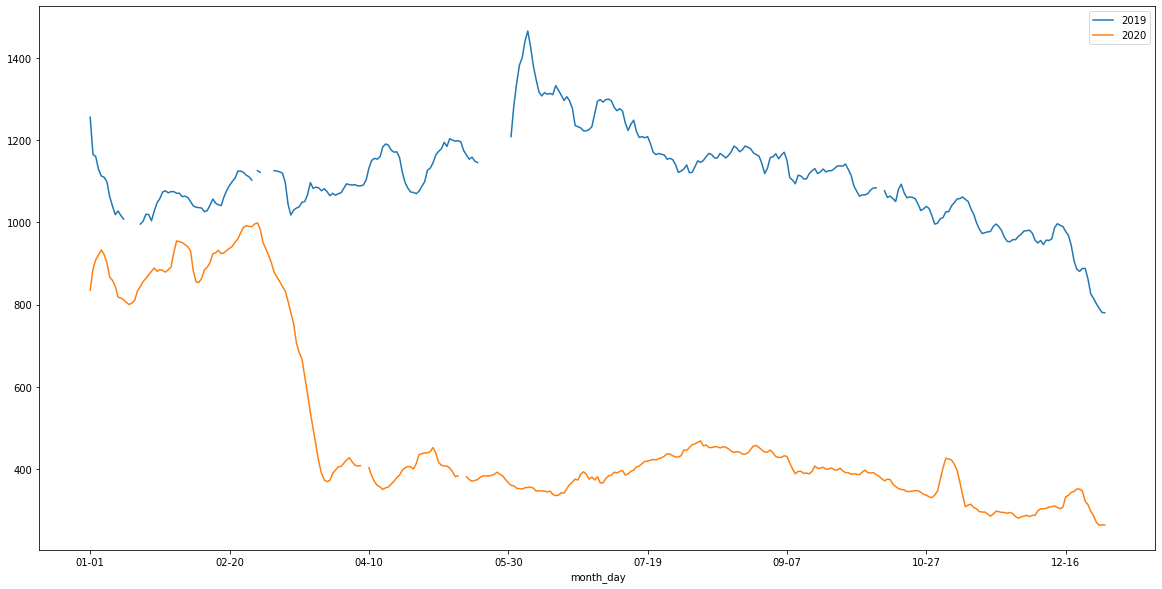

In [624]:
df_plot2.plot(y=years,figsize=(20,10))

# Case Study No. 2: Chicago's top-20 connected out-state counties in 2019.

## extract data

May take 5 minutes

In [626]:
params = {"operation": "od_extract_data",
       "odt_cube": "sg_od_2019_county",
       "begin": "01/01/2019" ,
       "end": "12/31/2019",
       "bbox": "-90,90,-180,180",
       "type": "aggregated"}

print("Fetching data...")
q = r'http://gis.cas.sc.edu/GeoAnalytics/REST'
r = requests.get(q, params=params)

df = pd.read_csv(StringIO(r.text))
df = df[df['d_place'] != df['o_place']]

target_FIPS = "17031"  # Cook County in Chicago

df['o_place'] = df['o_place'].astype(str).str.zfill(5)
df['d_place'] = df['d_place'].astype(str).str.zfill(5)

df = df[df['d_place'] == target_FIPS]
print("Number of records:", len(df))
df.head()

Fetching data...
Number of records: 3209


,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
966,20057,17031,1550,37.757,-100.013,41.877,-87.727
1176,29023,17031,6760,36.749,-90.422,41.862,-87.718
7540,25015,17031,3279,42.322,-72.563,41.923,-87.754
9050,12045,17031,150,29.825,-85.290,41.894,-87.765
11034,17011,17031,16447,41.380,-89.410,41.871,-87.766


In [627]:
top_count = 20
df_tops = df[df['o_place'].str[:2] != str(target_FIPS)[:2]]
df_tops = df_tops.sort_values('cnt',ascending = False).head(top_count)

df_tops

,o_place,d_place,cnt,o_lat,o_lon,d_lat,d_lon
599508,18089,17031,2436789,41.537,-87.428,41.733,-87.667
1962356,55079,17031,398701,43.036,-87.955,41.901,-87.762
3663654,29189,17031,395589,38.650,-90.404,41.882,-87.726
2546549,18097,17031,377216,39.797,-86.141,41.853,-87.715
1317296,18127,17031,326769,41.521,-87.111,41.798,-87.697
2334827,06037,17031,296647,34.064,-118.304,41.904,-87.738
3376052,26163,17031,219050,42.338,-83.228,41.866,-87.718
2779441,27053,17031,215603,44.974,-93.351,41.887,-87.734
4855822,26125,17031,202811,42.575,-83.309,41.896,-87.719
5702392,04013,17031,191672,33.503,-111.996,41.904,-87.771


## show map

In [628]:
from keplergl import KeplerGl
import json

county_file = r'gz_2010_us_050_00_20m.json'
state_file = r'gz_2010_us_040_00_20m.json'

o_places = df_tops['o_place'].to_list()

county_gdf = geopandas.read_file(county_file)
state_gdf = geopandas.read_file(state_file)
state_gdf = state_gdf.set_index("STATE")
state_gdf = state_gdf.drop(['GEO_ID', 'LSAD', 'CENSUSAREA', 'geometry'], axis=1)

county_gdf['place'] = county_gdf['GEO_ID'].str[-5:]
county_tops = county_gdf[county_gdf['place'].isin(o_places)]
origin_place = county_gdf[county_gdf['place'] == str(target_FIPS)]


results = df_tops.set_index("o_place").join(county_gdf.set_index('place'))
series = [results['NAME'], results['cnt']]
results = pd.concat(series, axis=1)

results['STATE_CODE'] = results.index
results['STATE_CODE'] = results['STATE_CODE'].str[:2]
results = results.set_index('STATE_CODE').join(state_gdf, how="left", rsuffix="_STATE")
results = results.sort_values("cnt", ascending=False)  
results['Rank'] = results.reset_index().index + 1
results = results.reset_index().drop(['index'], axis=1)
print(results)

kepler_cfg_file = r'kepler_cfg.json'
kepler_cfg = json.load(open(kepler_cfg_file, 'r'))
map_2 = KeplerGl(height = 600)
map_2.config = kepler_cfg

map_2.add_data(data=county_tops, name='counties_geometry')
map_2.add_data(data=df_tops, name='df_tops')
map_2.add_data(data=origin_place, name='origin place')
 
map_2

           NAME      cnt  NAME_STATE  Rank
0          Lake  2436789     Indiana     1
1     Milwaukee   398701   Wisconsin     2
2     St. Louis   395589    Missouri     3
3        Marion   377216     Indiana     4
4        Porter   326769     Indiana     5
5   Los Angeles   296647  California     6
6         Wayne   219050    Michigan     7
7      Hennepin   215603   Minnesota     8
8       Oakland   202811    Michigan     9
9      Maricopa   191672     Arizona    10
10      Kenosha   190833   Wisconsin    11
11         Dane   181412   Wisconsin    12
12      Jackson   177470    Missouri    13
13       Harris   171144       Texas    14
14     Waukesha   168124   Wisconsin    15
15   Tippecanoe   165172     Indiana    16
16    Jefferson   159054    Kentucky    17
17      Johnson   154310      Kansas    18
18   St. Joseph   147614     Indiana    19
19       Dallas   142717       Texas    20
User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'ou6ayf5', 'type': …

If needed, saved the config file of keplergl widget.

In [606]:
cfg = map_2.config
with open('kepler_cfg.json', 'w') as fp:
    json.dump(cfg, fp,  indent=2)